In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [2]:
data = pd.read_csv('Epileptic Seizure Recognition.csv')

In [3]:
data.shape

(11500, 180)

In [4]:
data.head(10)

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
5,X14.V1.56,55,28,18,16,16,19,25,40,52,...,-12,-31,-42,-54,-60,-64,-60,-56,-55,5
6,X3.V1.191,-55,-9,52,111,135,129,103,72,37,...,-125,-99,-79,-62,-41,-26,11,67,128,4
7,X11.V1.273,1,-2,-8,-11,-12,-17,-15,-16,-18,...,-79,-91,-97,-88,-76,-72,-66,-57,-39,2
8,X19.V1.874,-278,-246,-215,-191,-177,-167,-157,-139,-118,...,-400,-379,-336,-281,-226,-174,-125,-79,-40,1
9,X3.V1.491,8,15,13,3,-6,-8,-5,4,25,...,49,31,11,-5,-17,-19,-15,-15,-11,4


In [5]:
data.isnull().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

In [6]:
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import plotly
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import init_notebook_mode, iplot

import imblearn


import seaborn as sns

init_notebook_mode(connected=True)
pd.set_option('display.max_columns', 100)

ModuleNotFoundError: No module named 'plotly'

In [7]:
data.shape

(11500, 180)

In [8]:
data['y'].value_counts()

y
4    2300
1    2300
5    2300
2    2300
3    2300
Name: count, dtype: int64

<Axes: >

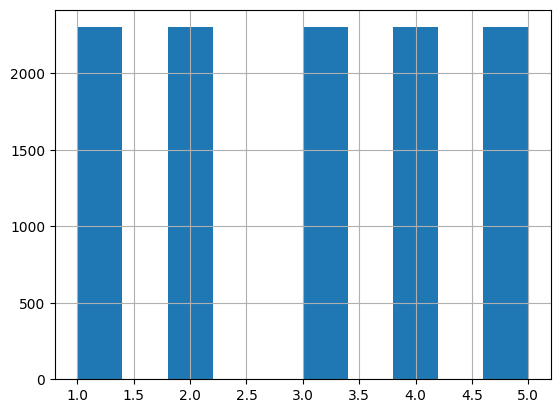

In [9]:
data.y.hist()

In [10]:
dic = {5: 0, 4: 0, 3: 0, 2: 0, 1: 1}
data['y'] = data['y'].map(dic)

In [11]:
print(data['y'].value_counts())

data.head()

y
0    9200
1    2300
Name: count, dtype: int64


,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [12]:
data = data.drop('Unnamed', axis = 1)

In [13]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,0.200000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,0.400017
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,0.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,0.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,0.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,1.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.7 MB


In [15]:
X = data.drop('y', axis=1)
y = data['y']
df = pd.DataFrame(normalize(X))
df

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,0.104109,0.146523,0.176599,0.171972,0.148066,0.096397,0.042415,-0.006941,-0.025449,-0.029305,...,0.006169,-0.013110,-0.011568,-0.023906,-0.059381,-0.079431,-0.097939,-0.089456,-0.064008,-0.039330
1,0.061209,0.060575,0.056452,0.052488,0.050743,0.049951,0.048682,0.043132,0.038692,0.036789,...,0.026640,0.026006,0.023786,0.023152,0.024103,0.024896,0.024737,0.024420,0.022676,0.020456
2,-0.038444,-0.046854,-0.056465,-0.044451,-0.038444,-0.043250,-0.068479,-0.087701,-0.102118,-0.112930,...,0.034840,0.068479,0.076889,0.057666,0.022826,-0.014417,-0.036042,-0.042048,-0.042048,-0.043250
3,-0.111276,-0.107037,-0.101738,-0.097499,-0.094319,-0.100678,-0.108096,-0.105977,-0.092200,-0.083722,...,-0.084781,-0.086901,-0.085841,-0.084781,-0.081602,-0.090080,-0.081602,-0.076303,-0.073124,-0.068885
4,-0.017182,-0.124093,-0.187094,-0.194730,-0.148911,-0.091638,-0.030546,0.000000,-0.040092,-0.112638,...,0.019091,0.007636,0.003818,-0.022909,-0.061092,-0.078274,-0.124093,-0.158457,-0.169912,-0.139366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-0.042703,-0.042703,-0.044644,-0.050468,-0.069878,-0.081525,-0.087348,-0.081525,-0.087348,-0.095112,...,0.038821,0.029116,0.031057,0.023293,0.009705,-0.001941,-0.034939,-0.071819,-0.091230,-0.093171
11496,-0.021589,-0.005053,0.012861,0.035369,0.064766,0.096920,0.112997,0.110241,0.088652,0.062470,...,-0.043178,-0.029857,-0.015158,-0.003215,0.006431,0.012402,0.022048,0.035369,0.053742,0.078087
11497,0.023487,0.010066,-0.021809,-0.026842,0.016776,0.043618,0.045296,-0.015099,0.006711,0.023487,...,-0.070460,-0.109046,-0.080526,-0.102335,-0.104013,-0.112401,-0.050329,-0.003355,-0.001678,-0.013421
11498,-0.040310,-0.025194,-0.009070,-0.012093,-0.002015,0.012093,0.007054,0.019147,0.022170,0.029225,...,0.114883,0.121938,0.136046,0.149147,0.144108,0.116899,0.086666,0.068527,0.059457,0.055426


In [16]:
# Initialize the counters for detected and managed outliers
detected_outliers = 0
managed_outliers = 0

# Loop through each of the 178 explanatory variables and calculate the IQR and bounds
for col in df.columns[:-1]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify any data points that fall outside the bounds and either remove or adjust them
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    if outliers.any():
        detected_outliers += outliers.sum()

        
        df.loc[outliers, col] = np.nanmedian(df[col])
        managed_outliers += outliers.sum()

print(f"Detected {detected_outliers} outliers and managed {managed_outliers} outliers.")


Detected 8269 outliers and managed 8269 outliers.


In [17]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,0.104109,0.146523,0.176599,0.171972,0.148066,0.096397,0.042415,-0.006941,-0.025449,-0.029305,...,0.006169,-0.013110,-0.011568,-0.023906,-0.059381,-0.079431,-0.097939,-0.089456,-0.064008,-0.039330
1,0.061209,0.060575,0.056452,0.052488,0.050743,0.049951,0.048682,0.043132,0.038692,0.036789,...,0.026640,0.026006,0.023786,0.023152,0.024103,0.024896,0.024737,0.024420,0.022676,0.020456
2,-0.038444,-0.046854,-0.056465,-0.044451,-0.038444,-0.043250,-0.068479,-0.087701,-0.102118,-0.112930,...,0.034840,0.068479,0.076889,0.057666,0.022826,-0.014417,-0.036042,-0.042048,-0.042048,-0.043250
3,-0.111276,-0.107037,-0.101738,-0.097499,-0.094319,-0.100678,-0.108096,-0.105977,-0.092200,-0.083722,...,-0.084781,-0.086901,-0.085841,-0.084781,-0.081602,-0.090080,-0.081602,-0.076303,-0.073124,-0.068885
4,-0.017182,-0.124093,-0.187094,-0.194730,-0.148911,-0.091638,-0.030546,0.000000,-0.040092,-0.112638,...,0.019091,0.007636,0.003818,-0.022909,-0.061092,-0.078274,-0.124093,-0.158457,-0.169912,-0.139366


In [18]:
df.shape

(11500, 178)

In [19]:
!pip install imblearn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Python311\python.exe -m pip install --upgrade pip


In [20]:
import imblearn
# define oversampling strategy
oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X, y = oversample.fit_resample(data.drop('y', axis=1), data['y'])

X.shape, y.shape

((18400, 178), (18400,))

In [21]:
data.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
X1,1.000000,0.947729,0.808192,0.608109,0.393674,0.218226,0.103693,0.044483,0.027923,0.032221,...,0.027263,0.045401,0.051630,0.049604,0.042967,0.036144,0.030581,0.024562,0.020022,-0.031262
X2,0.947729,1.000000,0.944623,0.790403,0.576579,0.369803,0.211793,0.109478,0.060218,0.043565,...,0.012602,0.025937,0.031606,0.030452,0.025975,0.024290,0.023906,0.021962,0.018059,-0.024503
X3,0.808192,0.944623,1.000000,0.939522,0.778648,0.573874,0.382493,0.231084,0.133249,0.080003,...,0.004575,0.011752,0.016424,0.017070,0.014837,0.015536,0.016982,0.017070,0.012419,-0.015615
X4,0.608109,0.790403,0.939522,1.000000,0.938636,0.784954,0.590497,0.399855,0.250052,0.150284,...,-0.001028,0.000632,0.006617,0.011882,0.014496,0.016992,0.016911,0.014671,0.006226,-0.002149
X5,0.393674,0.576579,0.778648,0.938636,1.000000,0.941267,0.792304,0.596424,0.410651,0.265112,...,0.004861,0.000918,0.006488,0.013946,0.019146,0.021924,0.018869,0.013607,0.001298,0.013362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X175,0.036144,0.024290,0.015536,0.016992,0.021924,0.022444,0.014869,-0.000510,-0.018552,-0.036517,...,0.195640,0.366428,0.573335,0.782018,0.936986,1.000000,0.933893,0.759069,0.533265,-0.038926
X176,0.030581,0.023906,0.016982,0.016911,0.018869,0.020977,0.017016,0.005851,-0.009052,-0.025522,...,0.084966,0.195891,0.359400,0.563321,0.767300,0.933893,1.000000,0.931826,0.759381,-0.037875
X177,0.024562,0.021962,0.017070,0.014671,0.013607,0.017383,0.018572,0.012590,0.001943,-0.011809,...,0.022042,0.071946,0.175322,0.337020,0.537493,0.759069,0.931826,1.000000,0.934330,-0.037212
X178,0.020022,0.018059,0.012419,0.006226,0.001298,0.004240,0.008325,0.008032,0.004823,-0.001332,...,-0.004094,0.001945,0.049854,0.155044,0.315385,0.533265,0.759381,0.934330,1.000000,-0.035855


In [22]:
print('Number of records of Non Epileptic {0} VS Epilepttic {1}'.format(len(y == True), len(y == False)))

Number of records of Non Epileptic 18400 VS Epilepttic 18400


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

#Check the shapes after splitting
he = X_train, X_test, y_train, y_test
[arr.shape for arr in he]

[(14720, 178), (3680, 178), (14720,), (3680,)]

In [24]:
# ** BUILDING MODELs **

In [25]:
models = [LogisticRegression(), SVC(),
          DecisionTreeClassifier(),
          RandomForestClassifier(), 
          GradientBoostingClassifier(),
          KNeighborsClassifier()]

#Check the correctness of list of classifiers and also 
model_name = [type(model).__name__ for model in models]
print(model_name)

# all parameters are not specified are set to their defaults
def classifiers(models):
    columns = ['Score', 'Predictions']
    df_result = pd.DataFrame(columns=columns, index=[type(model).__name__ for model in models])

    for model in models:
        clf = model
        print('Initialized classifier {} with default parameters \n'.format(type(model).__name__))    
        clf.fit(X_train, y_train)
        #make a predicitions for entire data(X_test)
        predictions = clf.predict(X_test)
        # Use score method to get accuracy of model
        score = clf.score(X_test, y_test)
        print('Score of classifier {} is: {} \n'.format(type(model).__name__, score))
        df_result['Score']['{}'.format(type(model).__name__)] = str(round(score * 100, 2)) + '%' 
        df_result['Predictions']['{}'.format(type(model).__name__)] = predictions
    return df_result

['LogisticRegression', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier']


In [26]:
classifiers(models)

Initialized classifier LogisticRegression with default parameters 



C:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adlercohen\AppData\Local\Temp\ipykernel_36060\776173485.py:25: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is whe

Score of classifier LogisticRegression is: 0.5668478260869565 

Initialized classifier SVC with default parameters 

Score of classifier SVC is: 0.970108695652174 

Initialized classifier DecisionTreeClassifier with default parameters 



C:\Users\adlercohen\AppData\Local\Temp\ipykernel_36060\776173485.py:25: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_result['Score']['{}'.format(type(model).__name__)] = str(round(score * 100, 2)) + '%'
C:\Users\adlercohen\AppData\Local\

Score of classifier DecisionTreeClassifier is: 0.9695652173913043 

Initialized classifier RandomForestClassifier with default parameters 



C:\Users\adlercohen\AppData\Local\Temp\ipykernel_36060\776173485.py:25: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_result['Score']['{}'.format(type(model).__name__)] = str(round(score * 100, 2)) + '%'
C:\Users\adlercohen\AppData\Local\

Score of classifier RandomForestClassifier is: 0.9904891304347826 

Initialized classifier GradientBoostingClassifier with default parameters 



C:\Users\adlercohen\AppData\Local\Temp\ipykernel_36060\776173485.py:25: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_result['Score']['{}'.format(type(model).__name__)] = str(round(score * 100, 2)) + '%'
C:\Users\adlercohen\AppData\Local\

Score of classifier GradientBoostingClassifier is: 0.970108695652174 

Initialized classifier KNeighborsClassifier with default parameters 



C:\Users\adlercohen\AppData\Local\Temp\ipykernel_36060\776173485.py:25: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_result['Score']['{}'.format(type(model).__name__)] = str(round(score * 100, 2)) + '%'
C:\Users\adlercohen\AppData\Local\

Score of classifier KNeighborsClassifier is: 0.9671195652173913 



C:\Users\adlercohen\AppData\Local\Temp\ipykernel_36060\776173485.py:25: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_result['Score']['{}'.format(type(model).__name__)] = str(round(score * 100, 2)) + '%'
C:\Users\adlercohen\AppData\Local\

,Score,Predictions
LogisticRegression,56.68%,"[1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, ..."
SVC,97.01%,"[1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, ..."
DecisionTreeClassifier,96.96%,"[1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, ..."
RandomForestClassifier,99.05%,"[1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, ..."
GradientBoostingClassifier,97.01%,"[1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, ..."
KNeighborsClassifier,96.71%,"[1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, ..."
